In [ ]:
import pandas as pd
import numpy as np

# Define o número de produtos = 600
num_produtos = 600

# Cria dados fictícios para os produtos
produtos = {
    'produto_id': range(1, num_produtos + 1),
    'nome': [f"Produto {i}" for i in range(1, num_produtos + 1)],
    'categoria': np.random.choice(['Eletrônicos', 'Roupas', 'Alimentos'], num_produtos)
}

# Cria DataFrame com os produtos
df_produtos = pd.DataFrame(produtos)

# Define o número de vendas = 1000
num_vendas = 1000

# Cria os dados fictícios para as vendas
data_vendas = {
    'data': np.random.choice(pd.date_range('2024-04-01', periods=38), num_vendas),
    'produto_id': np.random.randint(1, num_produtos + 7, num_vendas),
    'quantidade': np.random.randint(50, 200, num_vendas),
    'valor_total': np.random.randint(1000, 16300, num_vendas)
}



In [ ]:
# Cria DataFrame com as vendas
df_vendas = pd.DataFrame(data_vendas)

# Salva os DataFrames em arquivos .CSV
df_vendas.to_csv('vendas.csv', index=False)
df_produtos.to_csv('produtos.csv', index=False)

# Carrega os arquivos CSV em DataFrames
df_vendas = pd.read_csv('vendas.csv')
df_produtos = pd.read_csv('produtos.csv')

# Junta os DataFrames
df_merge = pd.merge(df_vendas, df_produtos, on='produto_id', how='inner')

# Salva o DataFrame junto em um arquivo CSV
df_merge.to_csv('data_warehouse.csv', index=False)

# Carrega o Data Warehouse.CSV
df_warehouse = pd.read_csv('data_warehouse.csv')

# Imprime o conteúdo do Data Warehouse
print("Conteúdo do Data Warehouse:")
print(df_warehouse)

Conteúdo do Data Warehouse:
           data  produto_id  quantidade  valor_total         nome    categoria
0    2024-05-02         449         123         6136  Produto 449       Roupas
1    2024-04-22         449         104        14917  Produto 449       Roupas
2    2024-04-17         495          82         9005  Produto 495  Eletrônicos
3    2024-04-30         495         112        11678  Produto 495  Eletrônicos
4    2024-04-12         144         195        14703  Produto 144  Eletrônicos
..          ...         ...         ...          ...          ...          ...
983  2024-04-21         268         198         6374  Produto 268       Roupas
984  2024-04-22          53         108        14325   Produto 53    Alimentos
985  2024-04-16         375         105        11569  Produto 375       Roupas
986  2024-04-05          17         150        13389   Produto 17       Roupas
987  2024-04-26         504         143         7599  Produto 504  Eletrônicos

[988 rows x 6 columns]


Análise de vendas por produto:
             quantidade  valor_total
nome                                
Produto 1           196        11118
Produto 10          186        17251
Produto 100         220         9693
Produto 101         287        20300
Produto 103          71        14834
...                 ...          ...
Produto 95          192         2770
Produto 96           99        12599
Produto 97          536        53072
Produto 98          423        19924
Produto 99           64        14139

[488 rows x 2 columns]

Análise de vendas por categoria de produto:
             quantidade  valor_total
categoria                           
Alimentos         37069      2556071
Eletrônicos       38151      2754360
Roupas            46117      3302554

Análise de tendências temporais:
            quantidade  valor_total
data                               
2024-04-01        4779       456498
2024-04-02        2843       199670
2024-04-03        2304       156783
2024-04-04        36

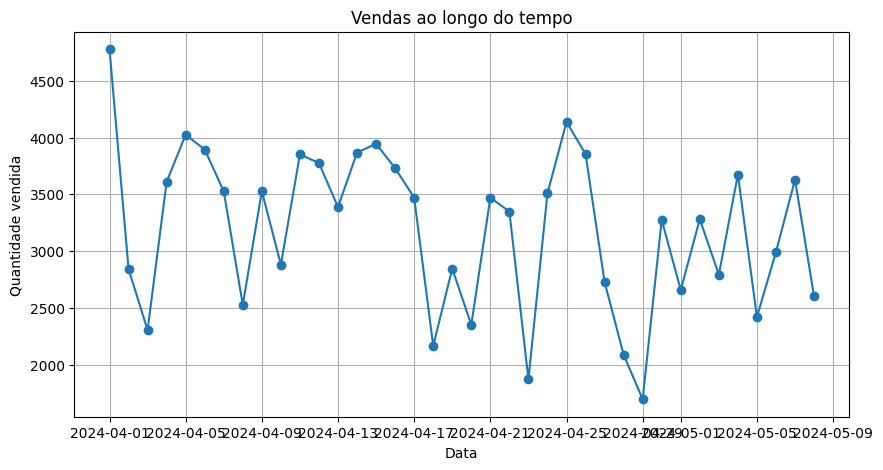


Análise de desempenho de produtos:
nome
Produto 1      11118
Produto 10     17251
Produto 100     9693
Produto 101    20300
Produto 103    14834
               ...  
Produto 95      2770
Produto 96     12599
Produto 97     53072
Produto 98     19924
Produto 99     14139
Name: valor_total, Length: 488, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Importa o arquivo
df_warehouse = pd.read_csv("data_warehouse.csv")

# Análise de vendas por produto
vendas_por_produto = df_warehouse.groupby('nome')[['quantidade', 'valor_total']].sum()
print('Análise de vendas por produto:')
print(vendas_por_produto)

# Análise de vendas por categoria de produto
vendas_por_categoria = df_warehouse.groupby('categoria')[['quantidade', 'valor_total']].sum()
print("\nAnálise de vendas por categoria de produto:")
print(vendas_por_categoria)

# Converte a coluna 'data' para o formato datetime
df_warehouse['data'] = pd.to_datetime(df_warehouse['data'])

# Análise de vendas por data
vendas_por_data = df_warehouse.groupby('data')[['quantidade', 'valor_total']].sum()
print("\nAnálise de tendências temporais:")
print(vendas_por_data)

# Visualiza vendas ao longo do tempo
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_data.index, vendas_por_data['quantidade'], marker='o', linestyle='-')
plt.title('Vendas ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Quantidade vendida')
plt.grid(True)
plt.show()

# Análisa o desempenho do produto
desempenho_produto = df_warehouse.groupby('nome')['valor_total'].sum()
print("\nAnálise de desempenho de produtos:")
print(desempenho_produto)


In [ ]:
import pandas as pd
import numpy as np
import os

# Verifica se o diretório 'data_lake' existe e cria se não existir
if not os.path.exists('data_lake'):
    os.makedirs('data_lake')

# Define o número de arquivos e o número de linhas por arquivo
num_files = 10
num_rows_per_file = 1038

dfs = []

# Loop para criar os arquivos
for i in range(num_files):
    # Cria dados fictícios para o arquivo atual
    data = {
        'coluna1': np.random.randint(0, 100, num_rows_per_file),
        'coluna2': np.random.randn(num_rows_per_file),
        'coluna3': np.random.choice(['A', 'B', 'C'], num_rows_per_file)
    }

    # Cria DataFrame com os dados
    df = pd.DataFrame(data)

    # Salva o DataFrame como um arquivo CSV no diretório 'data_lake'
    file_name = f'data_lake/dados_{i+1}.csv'
    df.to_csv(file_name, index=False)

    # Armazena o nome do arquivo e o DataFrame em uma lista
    dfs.append((file_name, df))

print("Dados do Data Lake gerados com sucesso!")

# Percorre os DataFrames armazenados e mostra as primeiras entradas de cada um
for file_name, df in dfs:
    print(f"Dados do arquivo: {file_name}\n")
    print(df.head())



Dados do Data Lake gerados com sucesso!
Dados do arquivo: data_lake/dados_1.csv

   coluna1   coluna2 coluna3
0       47  0.359912       C
1       32 -1.715578       C
2       56  0.496991       B
3       12 -0.074239       C
4       99  0.924015       A
Dados do arquivo: data_lake/dados_2.csv

   coluna1   coluna2 coluna3
0       83 -0.518346       B
1       96 -1.159874       C
2       88 -0.771559       A
3       24 -0.266215       B
4        0  0.379279       C
Dados do arquivo: data_lake/dados_3.csv

   coluna1   coluna2 coluna3
0       47 -0.444585       B
1       35 -2.073273       C
2       18  1.373286       A
3       43 -0.175168       C
4        2 -0.507833       A
Dados do arquivo: data_lake/dados_4.csv

   coluna1   coluna2 coluna3
0       99 -0.686423       C
1       93 -0.099253       B
2       23 -2.113884       C
3       48 -0.168721       A
4       97 -0.470072       C
Dados do arquivo: data_lake/dados_5.csv

   coluna1   coluna2 coluna3
0       18 -1.136689       B
1

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

# Defini a string de conexão com o banco de dados SQLite
conn_string = 'sqlite:///data_lake.db'

# Cria uma conexão com o banco de dados usando SQLAlchemy
engine = create_engine(conn_string)

# Defini o nome da tabela a ser lida
table_name = 'dados_1'

# Le os dados da tabela DataFrame
df = pd.read_sql_table(table_name, engine)

# Imprime as primeiras linhas do DataFrame
print("Primeiras linhas do DataFrame:")
print(df.head())

# Imprime informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
print(df.info())

# Imprime o resumo estatístico do DataFrame
print("\nResumo estatístico do DataFrame:")
print(df.describe())


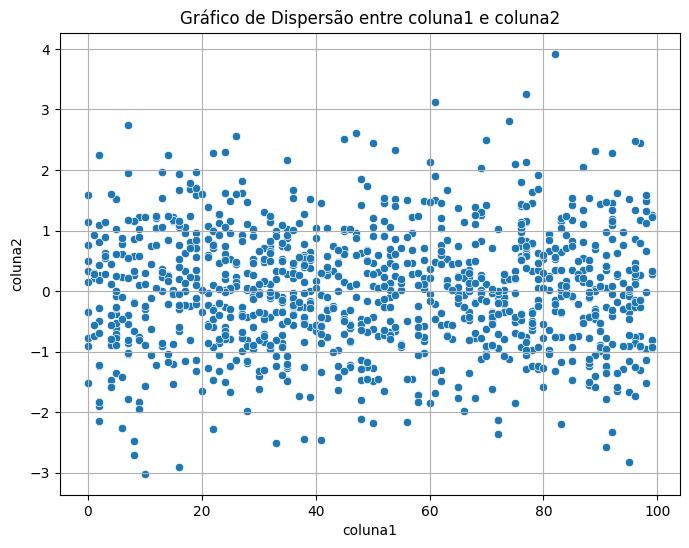

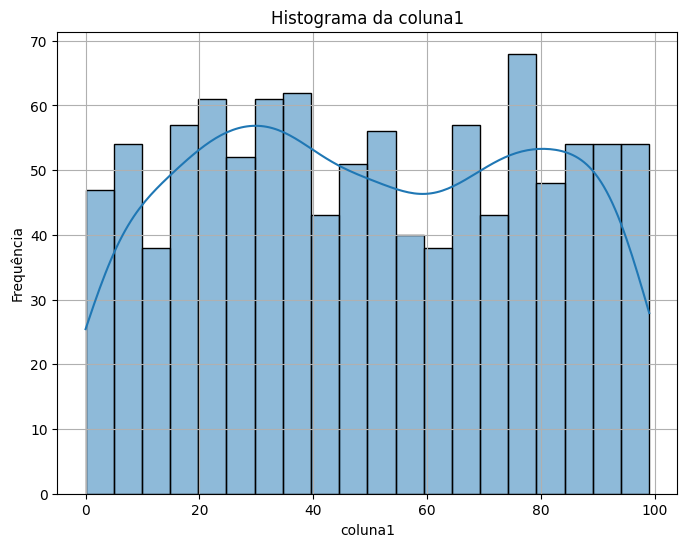

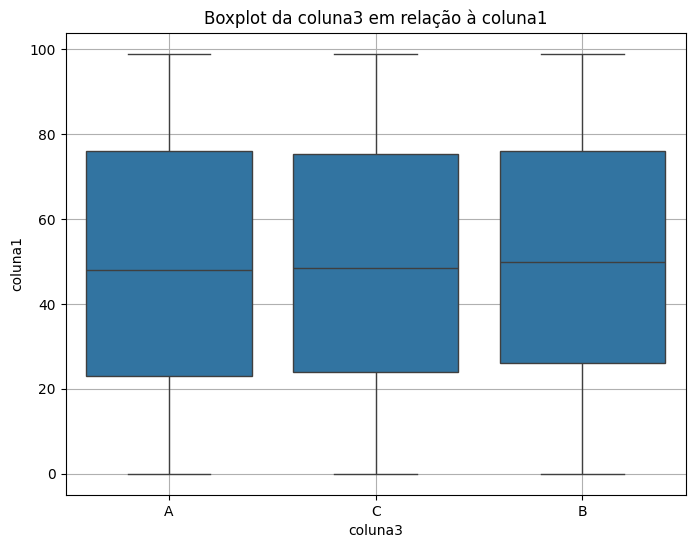

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de Dispersão entre coluna1 e coluna2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coluna1', y='coluna2', data=df)
plt.title('Gráfico de Dispersão entre coluna1 e coluna2')
plt.xlabel('coluna1')
plt.ylabel('coluna2')
plt.grid(True)
plt.show()

# Histograma da coluna1
plt.figure(figsize=(8, 6))
sns.histplot(df['coluna1'], bins=20, kde=True)
plt.title("Histograma da coluna1")
plt.xlabel('coluna1')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

# Boxplot da coluna3 em relação à coluna1
plt.figure(figsize=(8, 6))
sns.boxplot(x='coluna3', y='coluna1', data=df)
plt.title("Boxplot da coluna3 em relação à coluna1")
plt.xlabel('coluna3')
plt.ylabel('coluna1')
plt.grid(True)
plt.show()
